# Sam Broth and Max Sender

# Music Trends during the Pandemic

# Write Up hypothesis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from functools import partial
import requests
import json

In [2]:
tracks_df = pd.read_csv("../datasets/tracks.csv")
artist_df = pd.read_csv("../datasets/artists.csv")
final_df = pd.read_csv("../datasets/Final database.csv")
full_df = pd.read_csv("../datasets/Database to calculate popularity.csv")



C:\Users\MSend\anaconda3\envs\Capstone\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#tracks_df.sort_values('popularity', ascending=False)[tracks_df['popularity']>50].head()
tracks_df
#find the most popular tracks
tracks_df.sort_values('popularity', ascending=False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


In [4]:
mental_health_df = pd.read_csv("../datasets/mentalHealth_searchTrend.csv")


In [5]:
mental_health_df

,Category: All categories
Week,mental health: (United States)
2019-01-06,67
2019-01-13,65
2019-01-20,64
2019-01-27,65
...,...
2021-09-19,80
2021-09-26,84
2021-10-03,83
2021-10-10,94


In [31]:
full_df = pd.read_csv("../datasets/Database to calculate popularity.csv")

In [35]:
full_df['date'] = pd.to_datetime(full_df['date'],dayfirst=True)
full_df


,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,2020-11-05,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,2020-11-05,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,2020-11-05,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,2020-11-05,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,2020-11-05,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber
...,...,...,...,...,...,...,...,...
9806996,9806996,Taiwan,2017-01-01,197.0,https://open.spotify.com/track/3zHq9ouUJQFQRf3...,"Love Me Like You Do - From ""Fifty Shades Of G...","Love Me Like You Do - From ""Fifty Shades Of G...",Ellie Goulding
9806997,9806997,Taiwan,2017-01-01,198.0,https://open.spotify.com/track/3CRDbSIZ4r5MsZ0...,"Stressed Out , Twenty One Pilots",Stressed Out,Twenty One Pilots
9806998,9806998,Taiwan,2017-01-01,199.0,https://open.spotify.com/track/2mEvsc8k8iwR099...,"The End - From ""La La Land"" Soundtrack , Just...","The End - From ""La La Land"" Soundtrack",Justin Hurwitz
9806999,9806999,Taiwan,2017-01-01,200.0,https://open.spotify.com/track/0L7loeTIg6akW84...,"Light It Up - Remix , Major Lazer",Light It Up - Remix,Major Lazer


In [70]:
full_df.iloc[305933].uri
full_df['id'] = [x.split('/')[-1] if type(x)==str else float('nan') for x in full_df.uri.values]

In [72]:
f = partial(pd.to_datetime,yearfirst=True)
working_df = full_df[(full_df['date']>=f('01/01/2020')) & (full_df['date']<=f('06/30/2020'))].sort_values('date',ascending=False)

In [46]:
working_df[working_df['country']== 'USA'].track.value_counts().plot.pie()

305933                     Tongue Tied , Grouplove 
305935          Oprah's Bank Account  , Lil Yachty 
305936     Señorita , Shawn Mendes, Camila Cabello 
305937                     Rags2Riches  , Rod Wave 
305938       Make It Rain , Pop Smoke, Rowdy Rebel 
                            ...                    
342094                           Hot  , Young Thug 
342095              EARFQUAKE , Tyler, The Creator 
342197                          Slide , H.E.R., YG 
342198             Whiskey Glasses , Morgan Wallen 
342199                           All Me  , Kehlani 
Name: track, Length: 36400, dtype: object

In [60]:
tracks_df[(tracks_df['name']=='Tongue Tied') & (tracks_df['artists']=="['Grouplove']")]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
84077,0GO8y8jQk1PkHzS31d699N,Tongue Tied,83,218013,0,['Grouplove'],['3kVUvbeRdcrqQ3oHk5hPdx'],2011-09-02,0.56,0.936,3,-5.835,1,0.0439,0.00847,0.0,0.161,0.371,112.96,4
462056,5urJXg073FQhGTYsmOc4dB,Tongue Tied,49,218013,0,['Grouplove'],['3kVUvbeRdcrqQ3oHk5hPdx'],2011-09-13,0.56,0.936,3,-5.835,1,0.0439,0.00847,0.0,0.161,0.371,112.96,4
492450,678jXJOHDRZJT8IBzwgQFb,Tongue Tied,45,218013,0,['Grouplove'],['3kVUvbeRdcrqQ3oHk5hPdx'],2011-09-02,0.56,0.936,3,-5.835,1,0.0439,0.00847,0.0,0.161,0.371,112.96,4


In [75]:
holder_df = working_df.merge(tracks_df,on='id',how='inner')

<AxesSubplot:ylabel='Frequency'>

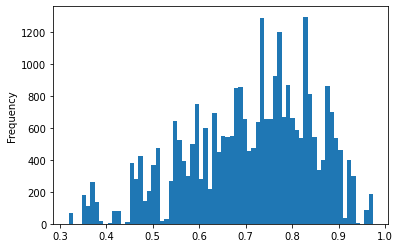

In [79]:
holder_df[holder_df['country']== 'USA'].danceability.plot.hist(bins=70)
#break into two, one pre covid and one present covid